In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [6]:
df = pd.read_csv("/home/shrine/VoltVision/model_training/collaboration_notebooks/weather.csv")

In [7]:
df

,datetime,Demand (MW),Name,Temperature,dewpoint,humidity,cloudcover,visibility,solarradiation,severerisk,conditions
0,1/1/2020 0:00,445.8,Pokhara,38.0,29.0,69.76,100.0,9.9,0.0,0.0,Overcast
1,1/1/2020 1:00,424.5,Pokhara,38.0,29.9,72.37,100.0,9.9,0.0,0.0,Overcast
2,1/1/2020 2:00,423.5,Pokhara,38.0,30.8,75.06,100.0,9.9,0.0,0.0,Overcast
3,1/1/2020 3:00,418.8,Pokhara,37.1,29.9,74.97,88.9,9.9,0.0,0.0,Partially cloudy
4,1/1/2020 4:00,414.8,Pokhara,35.1,29.0,78.41,0.0,9.9,0.0,0.0,Clear
...,...,...,...,...,...,...,...,...,...,...,...
27547,2/21/2023 19:00,498.7,Pokhara,50.0,29.0,44.19,50.0,9.9,0.0,10.0,Partially cloudy
27548,2/21/2023 20:00,498.8,Pokhara,50.0,28.1,42.59,88.9,9.9,0.0,10.0,Partially cloudy
27549,2/21/2023 21:00,506.4,Pokhara,53.1,26.1,34.92,100.0,9.9,0.0,10.0,Overcast
27550,2/21/2023 22:00,478.8,Pokhara,53.1,28.1,38.02,100.0,9.9,0.0,10.0,Overcast


In [9]:
selected_columns = df.columns[[1] + list(range(3, 10))]
selected_columns

Index(['Demand (MW)', 'Temperature', 'dewpoint', 'humidity', 'cloudcover',
       'visibility', 'solarradiation', 'severerisk'],
      dtype='object')

In [12]:
correlation_matrix =df[selected_columns].corr()
correlation_matrix

,Demand (MW),Temperature,dewpoint,humidity,cloudcover,visibility,solarradiation,severerisk
Demand (MW),1.000000,0.452340,0.362613,-0.195725,-0.065530,0.085060,0.375467,0.230560
Temperature,0.452340,1.000000,0.898811,-0.163430,-0.121519,0.136839,0.377109,0.151752
dewpoint,0.362613,0.898811,1.000000,0.278510,0.012451,-0.027876,0.129860,0.131495
humidity,-0.195725,-0.163430,0.278510,1.000000,0.299479,-0.422221,-0.526336,-0.043032
cloudcover,-0.065530,-0.121519,0.012451,0.299479,1.000000,-0.301867,-0.155138,-0.025562
visibility,0.085060,0.136839,-0.027876,-0.422221,-0.301867,1.000000,0.178409,0.040841
solarradiation,0.375467,0.377109,0.129860,-0.526336,-0.155138,0.178409,1.000000,0.098535
severerisk,0.230560,0.151752,0.131495,-0.043032,-0.025562,0.040841,0.098535,1.000000


<Axes: >

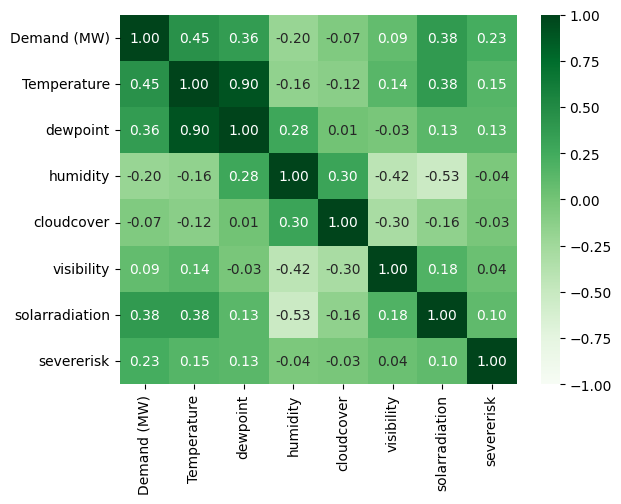

In [14]:
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", vmin=-1, vmax=1)

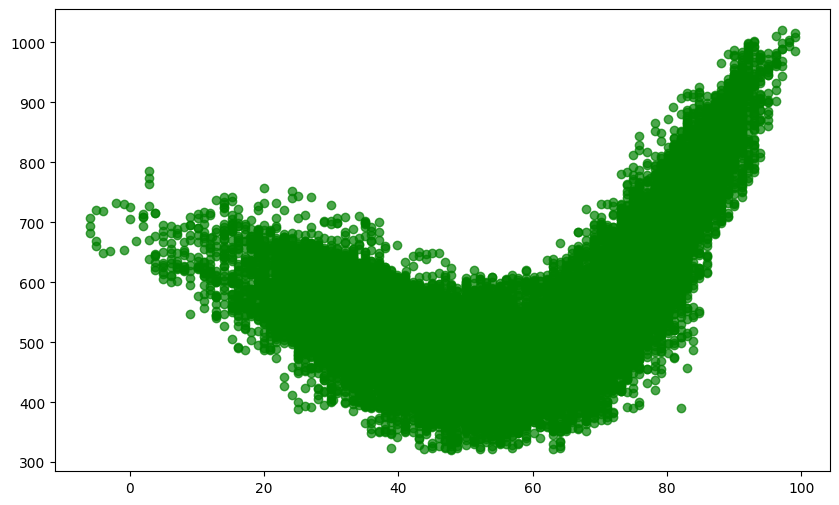

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Demand (MW)'], color='green', label='Data Points', alpha=0.7)

In [22]:
df[df['Temperature'] == df['Temperature'].min()]

,datetime,Demand (MW),Name,Temperature,dewpoint,humidity,cloudcover,visibility,solarradiation,severerisk,conditions
26093,12/23/2022 5:00,682.4,Pokhara,-5.9,-14.9,64.11,88.9,6.2,0.0,10.0,Partially cloudy
26094,12/23/2022 6:00,693.1,Pokhara,-5.9,-14.9,64.11,88.9,6.2,0.0,10.0,Partially cloudy
26095,12/23/2022 7:00,707.8,Pokhara,-5.9,-13.0,70.47,100.0,5.0,4.0,10.0,Overcast


In [30]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Separate 'DateTime' into 'Date' and 'Time' columns
df['Date'] = df['datetime'].dt.date
df['Time'] = df['datetime'].dt.time

In [40]:
g = df.groupby('Date')
avgdf = g.max()
avgdf

,datetime,Demand (MW),Name,Temperature,dewpoint,humidity,cloudcover,visibility,solarradiation,severerisk,conditions,Time
Date,,,,,,,,,,,,
2020-01-01,2020-01-01 23:00:00,494.3,Pokhara,51.2,30.8,78.64,100.0,9.9,497.0,0.0,Partially cloudy,23:00:00
2020-01-02,2020-01-02 23:00:00,571.5,Pokhara,51.2,48.8,93.45,100.0,9.9,81.0,0.0,"Rain, Overcast",23:00:00
2020-01-03,2020-01-03 23:00:00,555.6,Pokhara,51.2,50.0,96.69,100.0,9.9,87.0,0.0,"Rain, Partially cloudy",23:00:00
2020-01-04,2020-01-04 23:00:00,559.6,Pokhara,39.8,36.0,85.95,100.0,9.9,252.0,0.0,"Rain, Overcast",23:00:00
2020-01-05,2020-01-05 23:00:00,519.0,Pokhara,53.1,34.1,88.53,0.0,9.9,499.0,0.0,Clear,23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,2023-02-17 23:00:00,603.8,Pokhara,36.0,32.0,85.32,100.0,9.9,313.0,10.0,"Rain, Overcast",23:00:00
2023-02-18,2023-02-18 23:00:00,551.3,Pokhara,48.8,26.1,83.98,0.0,9.9,796.0,10.0,Clear,23:00:00
2023-02-19,2023-02-19 23:00:00,462.9,Pokhara,59.0,37.1,63.85,88.9,9.9,780.0,10.0,Partially cloudy,23:00:00


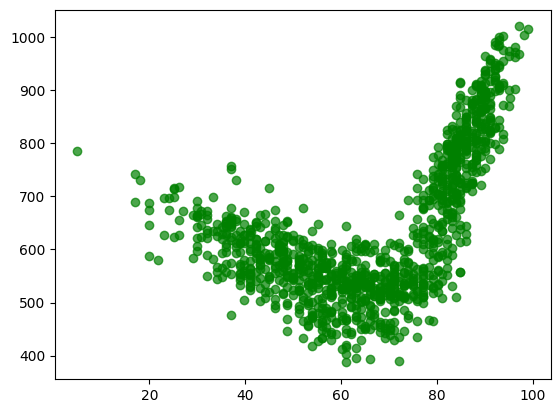

In [35]:
plt.scatter(avgdf['Temperature'], avgdf['Demand (MW)'], color='green', label='Data Points', alpha=0.7)

In [46]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by date and then by month within each date, and calculate the maximum for numeric columns
result_df = df.groupby(df['datetime'].dt.to_period("M"))[numeric_columns].max().reset_index()

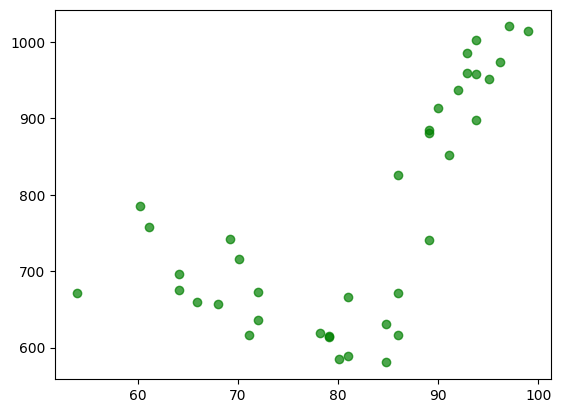

In [47]:
plt.scatter(result_df['Temperature'], result_df['Demand (MW)'], color='green', label='Data Points', alpha=0.7)

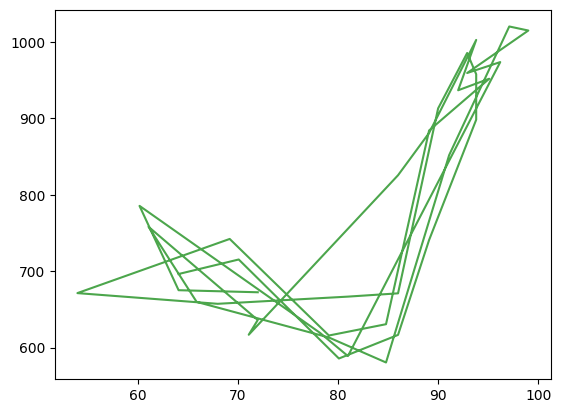

In [48]:
plt.plot(result_df['Temperature'], result_df['Demand (MW)'], color='green', label='Data Points', alpha=0.7)

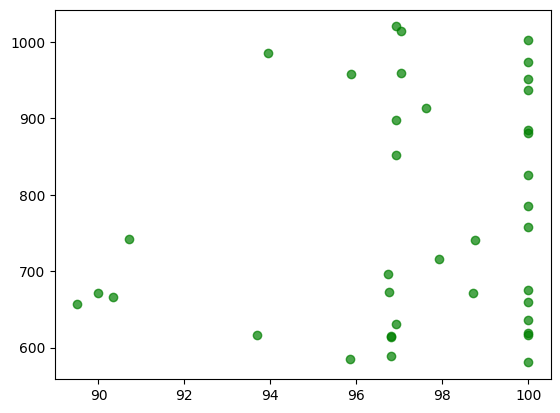

In [50]:
plt.scatter(result_df['humidity'], result_df['Demand (MW)'], color='green', label='Data Points', alpha=0.7)

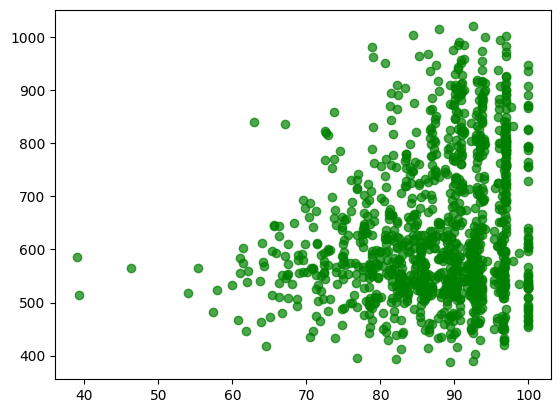

In [51]:
plt.scatter(avgdf['humidity'], avgdf['Demand (MW)'], color='green', label='Data Points', alpha=0.7)

<Axes: xlabel='Temperature', ylabel='Demand (MW)'>

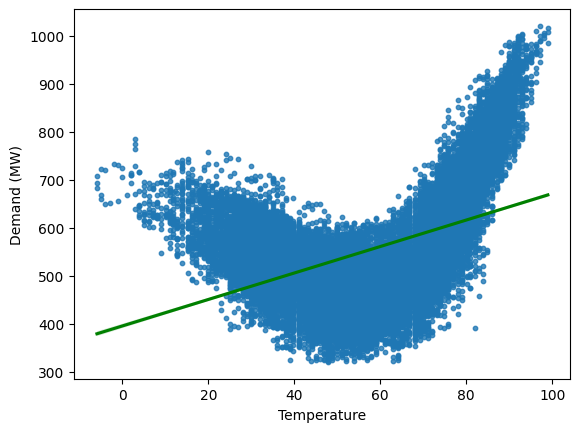

In [52]:
sns.regplot(x='Temperature', y='Demand (MW)', data=df, scatter_kws={'s': 10}, line_kws={'color': 'green'})

<Axes: xlabel='Temperature', ylabel='Demand (MW)'>

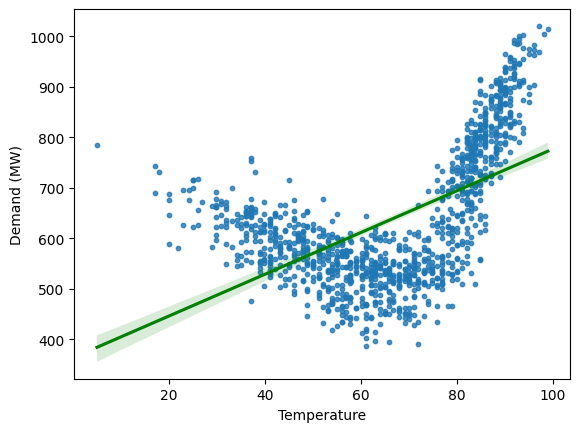

In [53]:
sns.regplot(x='Temperature', y='Demand (MW)', data=avgdf, scatter_kws={'s': 10}, line_kws={'color': 'green'})

<Axes: xlabel='Temperature', ylabel='Demand (MW)'>

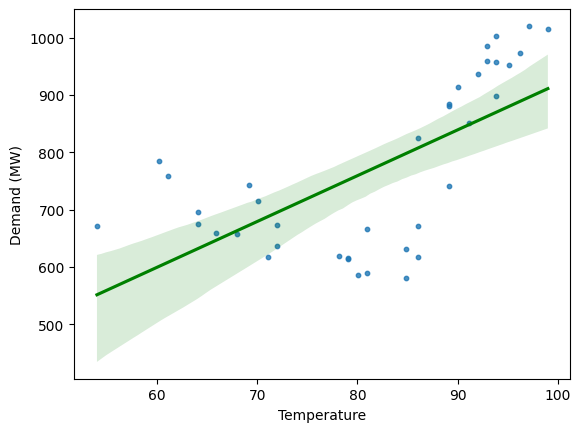

In [54]:
sns.regplot(x='Temperature', y='Demand (MW)', data=result_df, scatter_kws={'s': 10}, line_kws={'color': 'green'})

<Axes: xlabel='humidity', ylabel='Demand (MW)'>

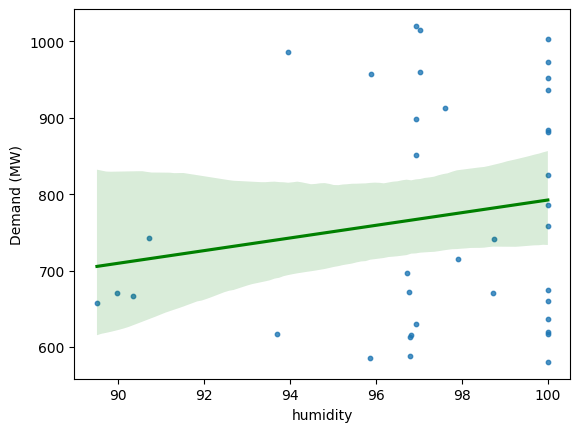

In [55]:
sns.regplot(x='humidity', y='Demand (MW)', data=result_df, scatter_kws={'s': 10}, line_kws={'color': 'green'})

<Axes: xlabel='dewpoint', ylabel='Demand (MW)'>

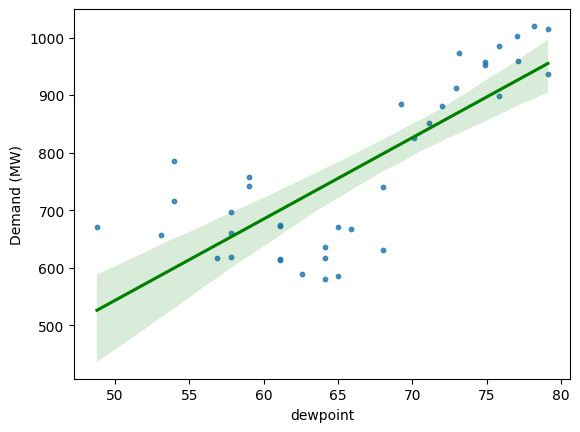

In [56]:
sns.regplot(x='dewpoint', y='Demand (MW)', data=result_df, scatter_kws={'s': 10}, line_kws={'color': 'green'})

<Axes: xlabel='severerisk', ylabel='Demand (MW)'>

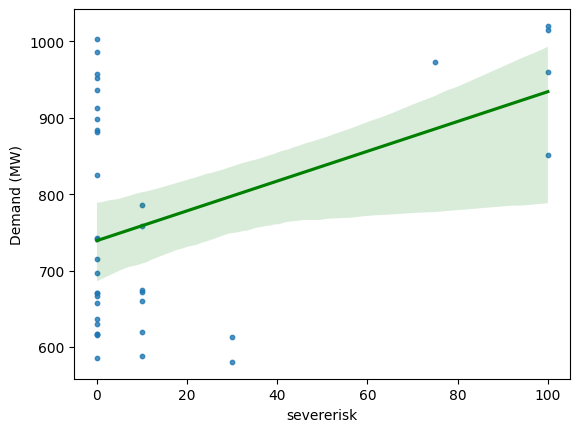

In [58]:
sns.regplot(x='severerisk', y='Demand (MW)', data=result_df, scatter_kws={'s': 10}, line_kws={'color': 'green'})

<Axes: xlabel='severerisk', ylabel='Demand (MW)'>

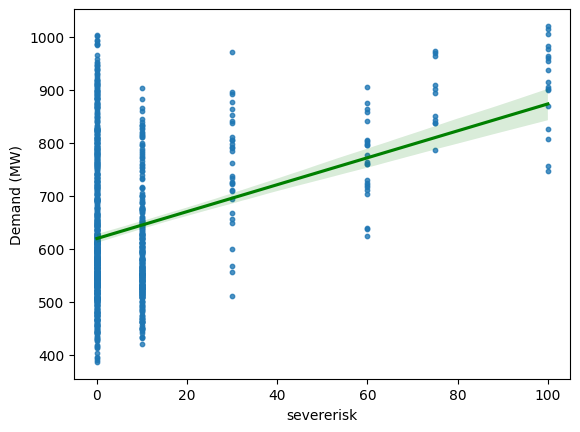

In [59]:
sns.regplot(x='severerisk', y='Demand (MW)', data=avgdf, scatter_kws={'s': 10}, line_kws={'color': 'green'})